In [2]:
import matplotlib.pyplot as plt
import numpy as np

from hazma.vector_mediator import VectorMediator

In [3]:
mx = 200.
mv = 1.
gvxx = 1.
gvuu = 1.
gvdd = -1.
gvss = 1.
gvee = 1.
gvmumu = 1.

vx_mw = 1.0e-3 # DM velocity in Milky Way halo
def ex(mx, vx=vx_mw):
    return mx + 0.5 * mx * vx**2

### Branching fractions

#### As a function of $m_\chi$

In [4]:
mx_min = 50.
mx_max = 250.
n_mxs = 250

mxs = np.logspace(np.log10(mx_min), np.log10(mx_max), n_mxs)

vm = VectorMediator(mx, mv, gvxx, gvuu, gvdd, gvss, gvee, gvmumu)

# Compute branching fractions for different DM masses
bfs_raw = []

for mx in mxs:
    vm.mx = mx
    bfs_raw.append(vm.branching_fractions(2. * ex(vm.mx)))
    
# "Transpose" the branching fraction dictionary
bfs = {}
for fs in vm.list_final_states():
    bfs[fs] = [bf[fs] for bf in bfs_raw]

/Users/acoogan/.pyenv/versions/2.7.13/Python.framework/Versions/2.7/lib/python2.7/site-packages/hazma/vector_mediator/__init__.py:41: PreAlphaWarning: Accessing pre-alpha feature.
  warnings.warn("", PreAlphaWarning)


/Users/acoogan/.pyenv/versions/2.7.13/Python.framework/Versions/2.7/lib/python2.7/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


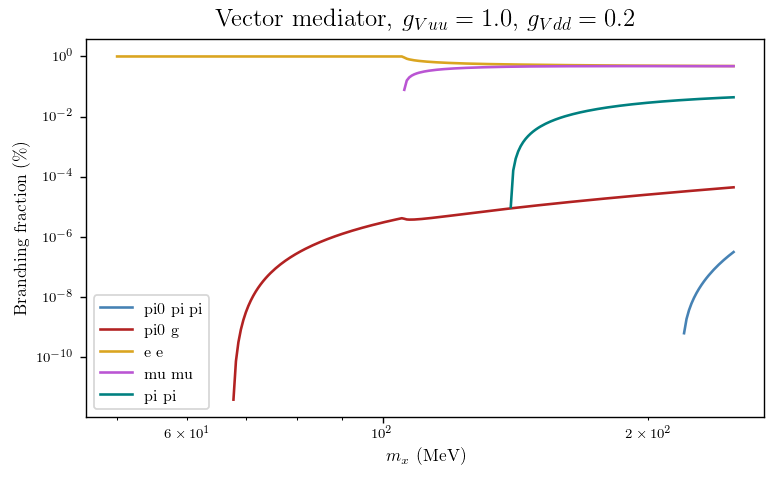

In [5]:
plt.figure(figsize=(7, 4))

for fs, bf_list in bfs.iteritems():
    plt.loglog(mxs, bf_list, label=fs)
    
plt.title("Vector mediator, $g_{Vuu} = %.1f$, $g_{Vdd} = %.1f$" % (vm.gvuu, vm.gvdd))
plt.xlabel(r"$m_x$ (MeV)")
plt.ylabel("Branching fraction (\%)")
plt.legend()

#### As a function of $g_{Vuu} / g_{Vdd}$ (with $g_{Vuu} = 1$)

In [4]:
rg_min = -10.
rg_max = 10.
gvdd = 1.

n_rgs = 250

rgs = np.linspace(rg_min, rg_max, n_rgs)

In [8]:
vm = VectorMediator(mx, mv, gvxx, gvuu, gvdd, gvss, gvee=0., gvmumu=0.)

bfs_varying_gs = {}

for mx in [250.]:
    vm.mx = mx
    
    # Compute branching fractions for different couplings
    bfs_raw = []

    for rg in rgs:
        vm.gvuu = vm.gvdd * rg
        bfs_raw.append(vm.branching_fractions(2. * ex(vm.mx)))

    # "Transpose" the branching fraction dictionary
    bfs = {}
    for fs in vm.list_final_states():
        bfs[fs] = [bf[fs] for bf in bfs_raw]
        
    bfs_varying_gs[mx] = bfs

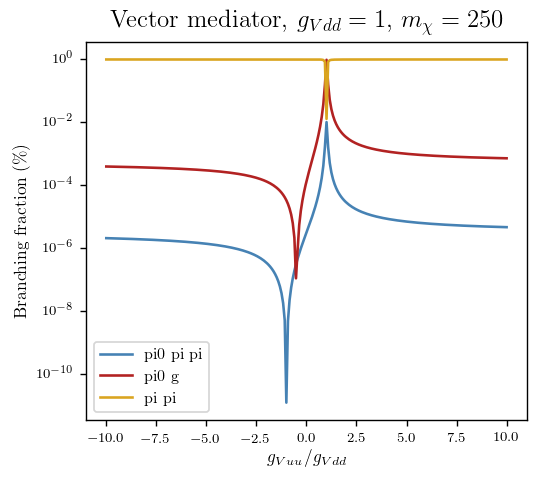

In [9]:
plt.figure(figsize=(10, 4))

for idx, (mx, bfs_g) in enumerate(bfs_varying_gs.iteritems()):
    plt.subplot(1, 2, idx+1)
    
    for fs, bf_list in bfs_g.iteritems():
        if fs != "e e" and fs != "mu mu":
            plt.plot(rgs, bf_list, label=fs)
        
    plt.yscale("log")
    
    if idx == 0:
        plt.legend()
        plt.ylabel("Branching fraction (\%)")
    
    plt.title("Vector mediator, $g_{Vdd} = 1$, $m_\chi = %.0f$" % mx)
    plt.xlabel(r"$g_{Vuu} / g_{Vdd}$")

### Spectrum

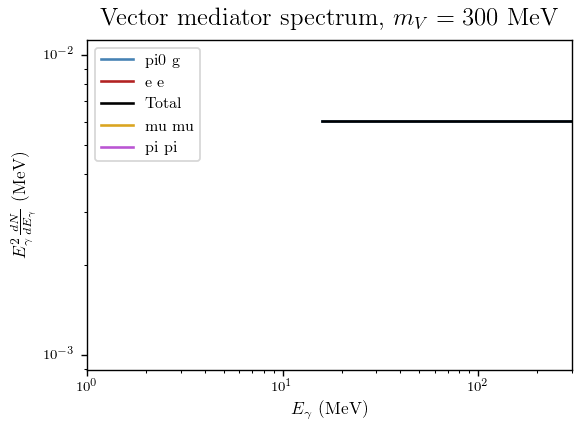

In [22]:
vm = VectorMediator(mx=300., mv=mv, gvxx=1., gvuu=1., gvdd=1., gvss=1., gvee=0., gvmumu=0.)

e_gams = np.logspace(0, np.log10(vm.mx), 100)

# DM spectra
spectra = vm.spectra(e_gams, 2.01*vm.mx)

for fs, spec in spectra.iteritems():
    if fs != "total":
        plt.loglog(e_gams, spec, label=fs)
    else:
        plt.loglog(e_gams, spec, "black", label="Total")

plt.title("Vector mediator spectrum, $m_V = %.0f$ MeV" % vm.mx)
plt.xlim(e_gams[[0, -1]])
plt.xlabel(r"$E_\gamma$ (MeV)")
# plt.ylabel(r"$\frac{dN}{dE_\gamma}$ (MeV$^{-1}$)")
plt.ylabel(r"$E_\gamma^2 \frac{dN}{dE_\gamma}$ (MeV)")
plt.legend()

### $\pi^+ \pi^-$ FSR and decay spectra in more detail

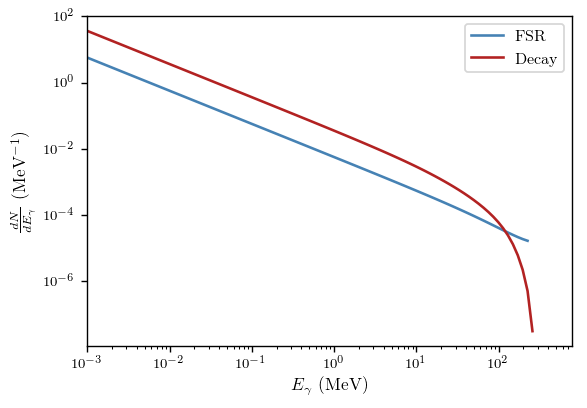

In [23]:
from hazma.vector_mediator.vector_mediator_spectra import dnde_pipi

e_gams = np.logspace(-3, np.log10(770), 100)

plt.loglog(e_gams, dnde_pipi(e_gams, 2.01*vm.mx, vm, "FSR"), label="FSR")
plt.loglog(e_gams, dnde_pipi(e_gams, 2.01*vm.mx, vm, "Decay"), label="Decay")

plt.xlim(e_gams[[0, -1]])
# plt.ylim(1e-7, 1e-1)
plt.xlabel(r"$E_\gamma$ (MeV)")
plt.ylabel(r"$\frac{dN}{dE_\gamma}$ (MeV$^{-1}$)")
# plt.ylabel(r"$E_\gamma^2 \frac{dN}{dE_\gamma}$ (MeV)")
plt.legend()

### Scratch